При помощи следующей программы: получить получить исходные данные для задачи классификации: матрицу признаков X и массив целевых меток y

In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

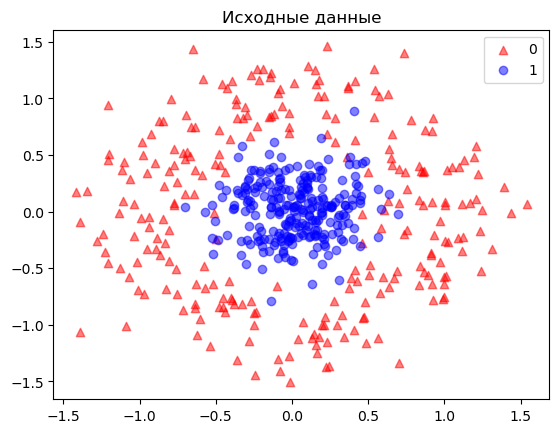

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=512, random_state=123, noise=0.22, factor=0.16)
plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5, label='1')
plt.legend()
plt.title("Исходные данные")
plt.show()

Задание 2. Создать и обучить модель классификации на основе логистической регрессии, использующию дополнительный признак квадрат расстояния от центра. выбрать оптимальные гиперпараметры модели.

In [3]:
x_copy = X.copy()

x_extra = np.sqrt(np.sum(x_copy**2, axis=1))

x_extra_feature = np.concatenate((x_copy, x_extra.reshape(x_copy.shape[0], 1)), axis=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_extra_feature, y, test_size=0.3, stratify=y)

In [5]:
lr = LogisticRegression(random_state=0)
param_grid_lr = {'penalty': ['l2','l1'],
                 'C': [0.001,0.01,0.1,1,10,100,1000],
                 'solver': ['liblinear']}
grid_lr = GridSearchCV(lr, param_grid_lr)
grid_lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1'], 'solver': ['liblinear']})

In [6]:
best_params = grid_lr.best_params_
print('\n best_params=', best_params)


 best_params= {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных, вероятность принадлежности первого образца к различным классам.

In [7]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != grid_lr.best_estimator_.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != grid_lr.best_estimator_.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.030726256983240222
Удельное количество ошибок на тестовом наборе: 0.07142857142857142


In [8]:
grid_lr.best_estimator_.predict_proba(x_train[[0]])

array([[0.9291, 0.0709]])